# EDA on IRIS Dataset using Logistic Regression Model

The goal of this notebook is to provide a certain templates on how to perform Exploratory Data Analysis on a dataset where in this case it is the iris dataset

In [48]:
# Importing Necessary Libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [7]:
# Loading the dataset
df = pd.read_csv('../Datasets/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Getting Information about the Dataset

In this part we are exploring the information about the dataset (EDA process)

In [10]:
df.shape

(150, 5)

**Checking for the data types of each columns**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Statistical Summary of each columns in the datasets**

In [42]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Checking Missing Values**

In [43]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**Checking Duplicates**

In [45]:
df = df.drop_duplicates()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Checking if for each specie(columns) the is an equal number of rows**

In [47]:
df.value_counts("species")

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

## Data Visualisation

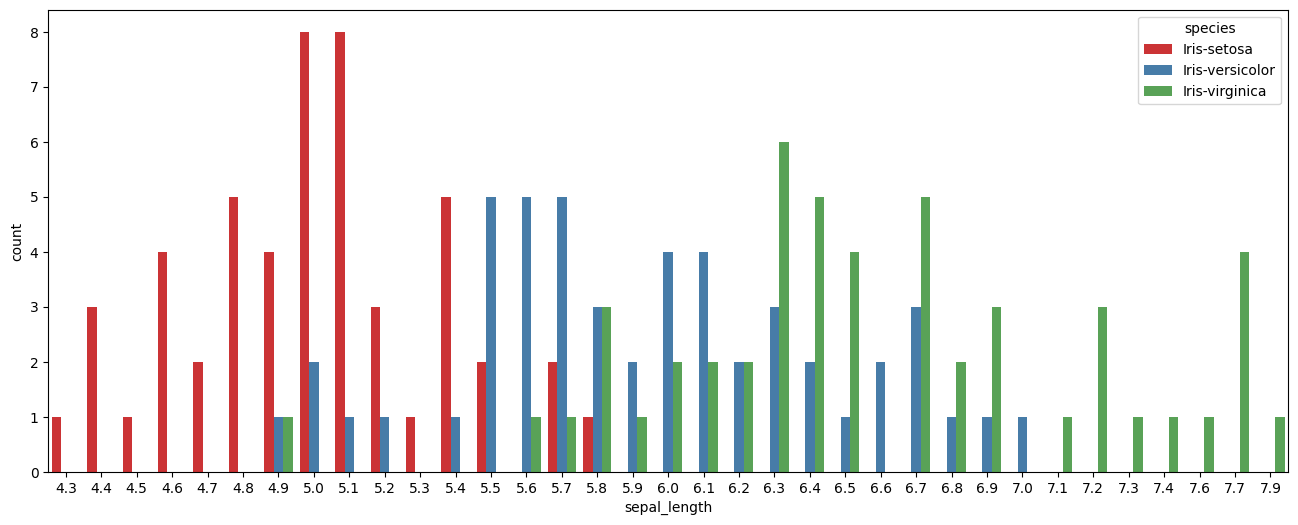

In [14]:
plt.figure(figsize=(16, 6))
sns.countplot(x='sepal_length', hue='species', data=df, palette='Set1')
plt.show()

From the graph above we observe that in the data the iris-setosa specie has the  highest sepal_length 

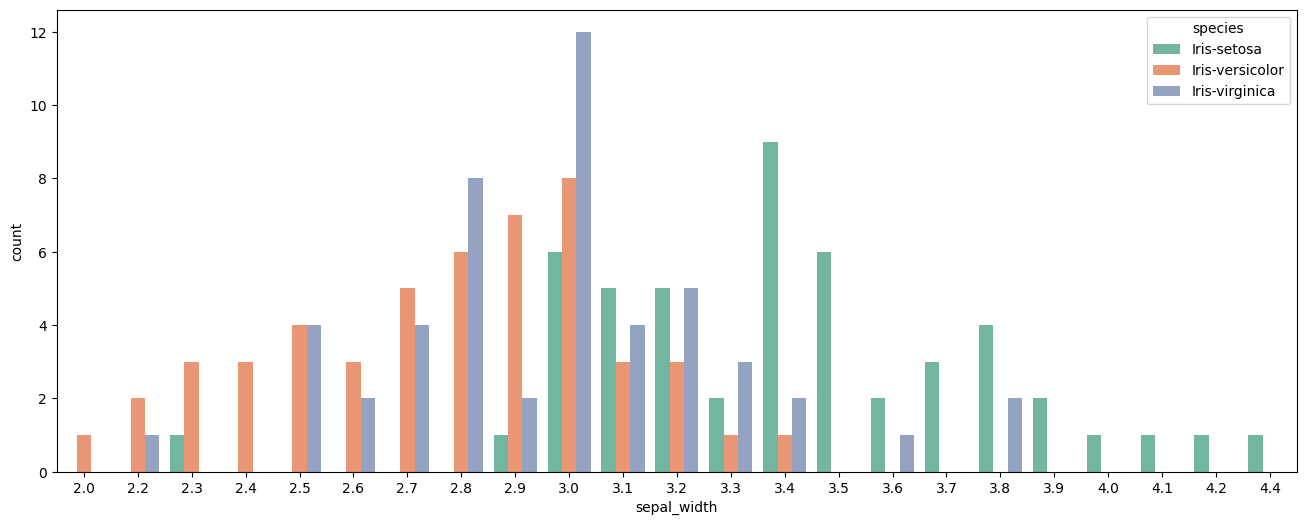

In [19]:
plt.figure(figsize=(16, 6))
sns.countplot(x='sepal_width', hue='species', data=df, palette='Set2')
plt.show()

from the graph above we observe that the iris-virginica has the highest sepal-lenght is this case relative to the others

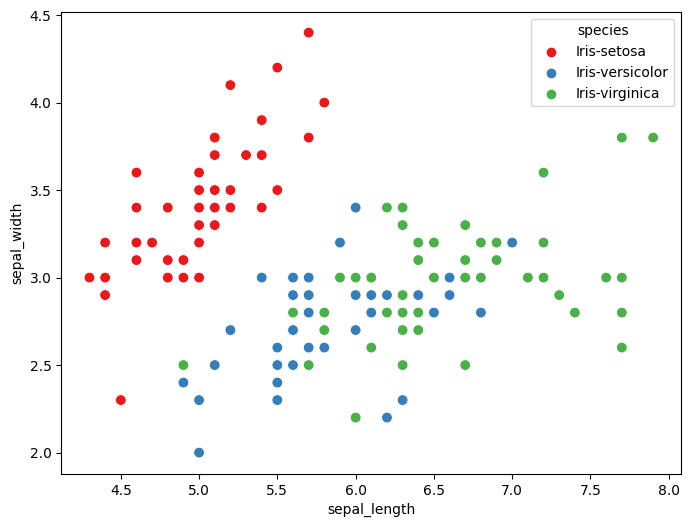

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=df, palette='Set1', s=60)
plt.show()

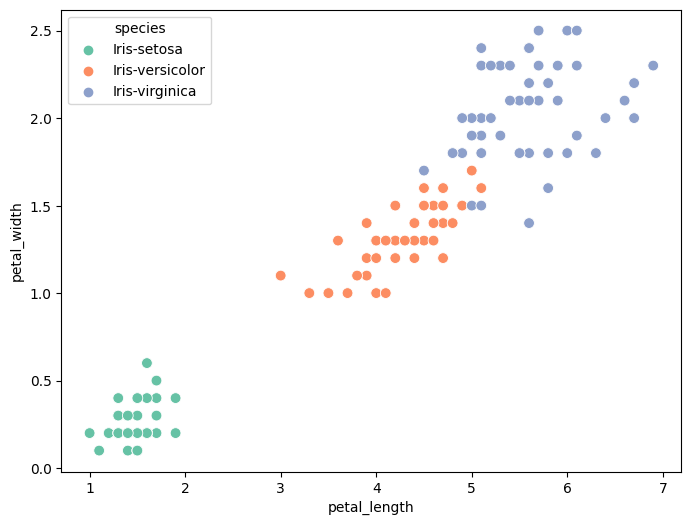

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="petal_length", y="petal_width", hue="species", data=df, palette='Set2', s=60)
plt.show()

<Figure size 1600x800 with 0 Axes>

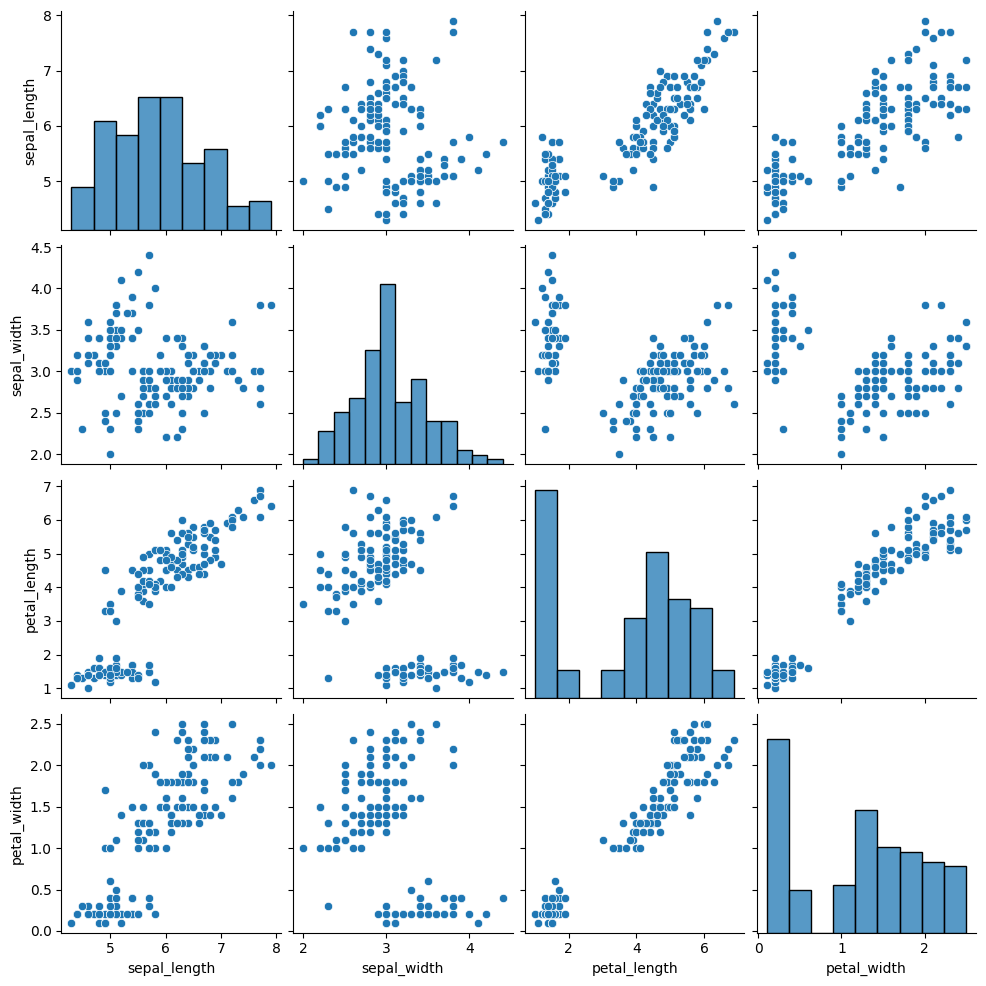

In [28]:
plt.figure(figsize=(16, 8))
sns.pairplot(df)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


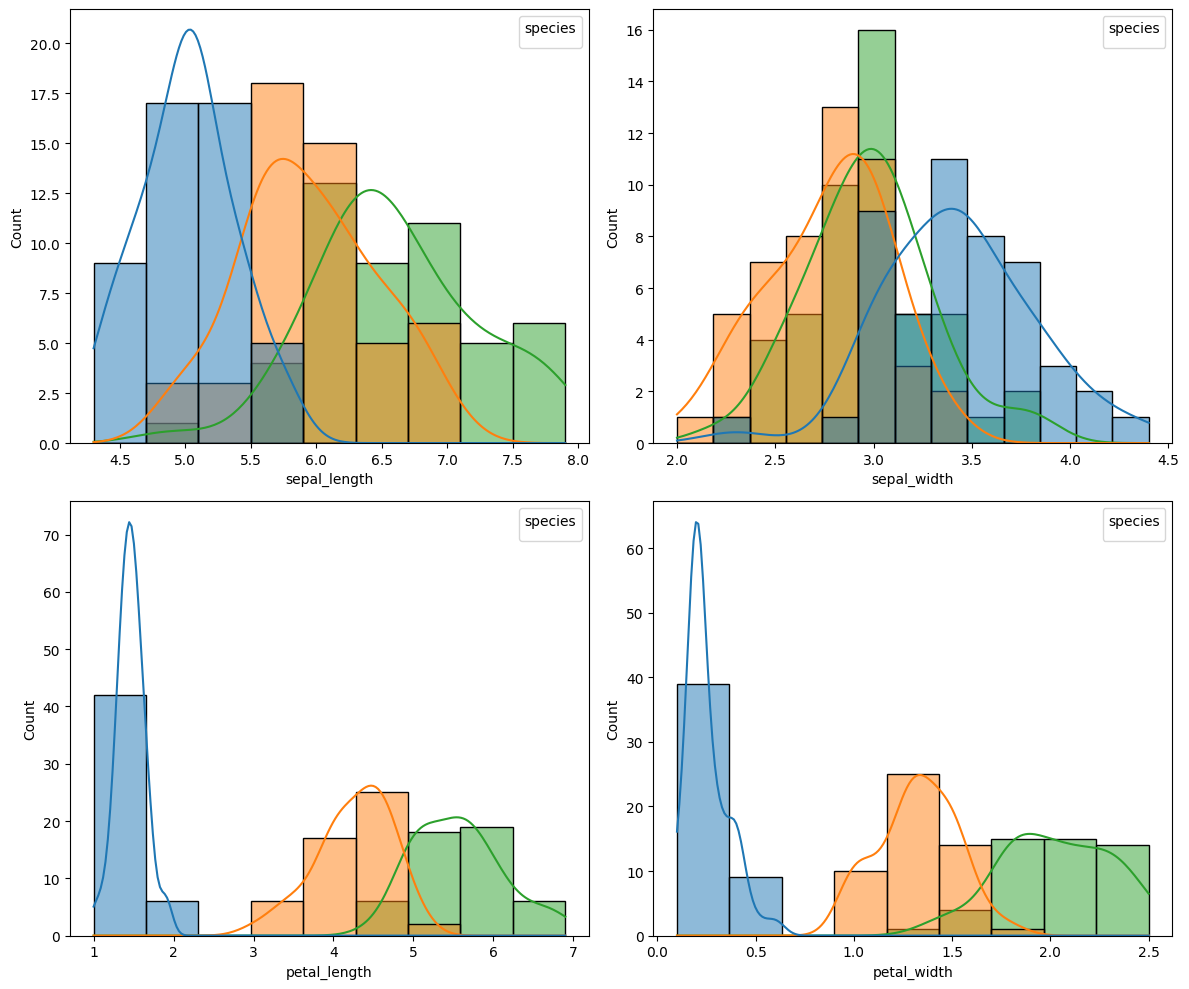

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot sepal_length
sns.histplot(df, x="sepal_length", hue="species", kde=True, ax=axes[0, 0])
axes[0, 0].legend(title='species')

# Plot sepal_width
sns.histplot(df, x="sepal_width", hue="species", kde=True, ax=axes[0, 1])
axes[0, 1].legend(title='species')

# Plot petal_length
sns.histplot(df, x="petal_length", hue="species", kde=True, ax=axes[1, 0])
axes[1, 0].legend(title='species')

# Plot petal_width
sns.histplot(df, x="petal_width", hue="species", kde=True, ax=axes[1, 1])
axes[1, 1].legend(title='species')

plt.tight_layout()
plt.show()

From the above plots, we can see that – 

In the case of Sepal Length, there is a huge amount of overlapping.
In the case of Sepal Width also, there is a huge amount of overlapping.
In the case of Petal Length, there is a very little amount of overlapping.
In the case of Petal Width also, there is a very little amount of overlapping.

## Logistique Regressiosn Model

In [32]:
X = df.drop('species', axis=1)
y = df['species']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

1.0

In [38]:
predicitons = lr.predict(X_test)
predicitons

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [39]:
y_test

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
110     Iris-virginica
12         Iris-setosa
36         Iris-setosa
9          Iris-setosa
19         Iris-setosa
56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
29         Iris-setosa
127     Iris-virginica
26         Iris-setosa
128     Iris-virginica
131     Iris-virginica
145     Iris-virginica
108     Iris-virginica
143     Iris-virginica
45         Iris-setosa
30         Iris-setosa
22         Iris-setosa
15         Iris-setosa
65     Iris-versicolor
11         Iris-setosa
42         Iris-setosa
146     Iris-virginica
51     Iris-versicolor
27         Iris-setosa
4          Iris-setosa
32         Iris-setosa
142     Iris-virginica
85     Iris-versicolor
86     Iris-versicolor
16         

In [41]:
accuracy_score(y_test, predicitons)

1.0